In [1]:
%load_ext autoreload
%autoreload 2
%cd ../..

E:\counterfactual-search


In [2]:
from pathlib import Path


root_dir = Path('./data/totalsegmentor')
print(list(root_dir.glob('*')))
train_dir = root_dir / 'train'
test_dir = root_dir / 'test'

nn_dir = root_dir / 'nnUNet_predictions'
print(list(test_dir.glob('*')))

[WindowsPath('data/totalsegmentor/nnUNet_predictions'), WindowsPath('data/totalsegmentor/test'), WindowsPath('data/totalsegmentor/train')]
[WindowsPath('data/totalsegmentor/test/control'), WindowsPath('data/totalsegmentor/test/cyst'), WindowsPath('data/totalsegmentor/test/tumor')]


In [3]:
list(test_dir.glob('**/*'))

[WindowsPath('data/totalsegmentor/test/control'),
 WindowsPath('data/totalsegmentor/test/cyst'),
 WindowsPath('data/totalsegmentor/test/tumor'),
 WindowsPath('data/totalsegmentor/test/control/s0011.nii.gz'),
 WindowsPath('data/totalsegmentor/test/control/s0011.nii.npy'),
 WindowsPath('data/totalsegmentor/test/control/s0028.nii.gz'),
 WindowsPath('data/totalsegmentor/test/control/s0028.nii.npy'),
 WindowsPath('data/totalsegmentor/test/control/s0038.nii.gz'),
 WindowsPath('data/totalsegmentor/test/control/s0038.nii.npy'),
 WindowsPath('data/totalsegmentor/test/control/s0053.nii.gz'),
 WindowsPath('data/totalsegmentor/test/control/s0053.nii.npy'),
 WindowsPath('data/totalsegmentor/test/control/s0082.nii.gz'),
 WindowsPath('data/totalsegmentor/test/control/s0082.nii.npy'),
 WindowsPath('data/totalsegmentor/test/control/s0158.nii.gz'),
 WindowsPath('data/totalsegmentor/test/control/s0158.nii.npy'),
 WindowsPath('data/totalsegmentor/test/control/s0238.nii.gz'),
 WindowsPath('data/totalsegmen

In [4]:
# data/totalsegmentor/test/control/s0703.nii.gz
import nibabel as nib

ct_scan = nib.load('data/totalsegmentor/test/control/s0703.nii.gz')  # loads the file. this usually comes with lots of metadata
numpy_volume = ct_scan.get_fdata()  # to just work with numpy array use get_fdata() method

In [5]:
# data/totalsegmentor/test/control/s0703.nii.gz
import nibabel as nib


train_paths = {p.name: list(p.glob('*.gz')) for p in train_dir.glob('*') if p.is_dir()}
print('train', {k: len(v) for k, v in train_paths.items()})

test_paths = {p.name: list(p.glob('*.gz')) for p in test_dir.glob('*') if p.is_dir()}
print('val', {k: len(v) for k, v in test_paths.items()})

print('total in split', sum(map(len, train_paths.values())) + sum(map(len, test_paths.values())))


nn_paths = list(nn_dir.glob('*.gz'))
print('nn preds', len(nn_paths))

train {'control': 136, 'cyst': 104, 'tumor': 102}
val {'control': 34, 'cyst': 26, 'tumor': 26}
total in split 428
nn preds 496


In [6]:
import pickle


plans = pickle.load((nn_dir / 'plans.pkl').open('rb'))
print(list(plans.keys()))

['num_stages', 'num_modalities', 'modalities', 'normalization_schemes', 'dataset_properties', 'list_of_npz_files', 'original_spacings', 'original_sizes', 'preprocessed_data_folder', 'num_classes', 'all_classes', 'base_num_features', 'use_mask_for_norm', 'keep_only_largest_region', 'min_region_size_per_class', 'min_size_per_class', 'transpose_forward', 'transpose_backward', 'data_identifier', 'plans_per_stage', 'preprocessor_name', 'conv_per_stage']


In [7]:
plans['base_num_features']

32

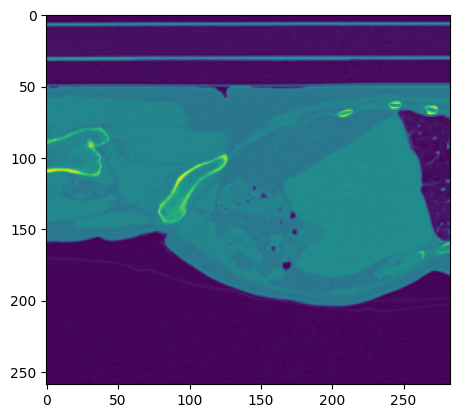

In [8]:
from matplotlib import pyplot as plt


ct_scan = nib.load(train_paths['cyst'][0])  # loads the file. this usually comes with lots of metadata
numpy_volume = ct_scan.get_fdata()
plt.imshow(numpy_volume[200])

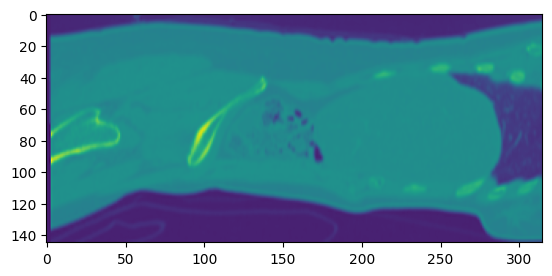

In [9]:
ct_scan = nib.load(train_paths['control'][0])  # loads the file. this usually comes with lots of metadata
numpy_volume = ct_scan.get_fdata()
plt.imshow(numpy_volume[200])

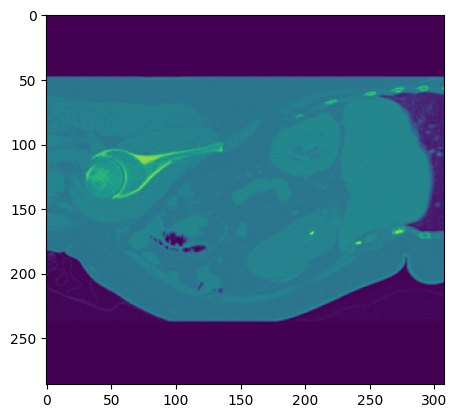

In [10]:
ct_scan = nib.load(train_paths['tumor'][0])  # loads the file. this usually comes with lots of metadata
numpy_volume = ct_scan.get_fdata()
plt.imshow(numpy_volume[200])

In [11]:
import numpy as np


train_names = set(p.name for lst in train_paths.values() for p in lst)
test_names = set(p.name for lst in test_paths.values() for p in lst)

for path in nn_paths:
    #     is_train = path.name in train_names
    if path.name in train_names:
        split = 'train'
        class_name = next(train_dir.glob(f'**/{path.name}')).parent.name
    elif path.name in test_names:
        split = 'test'
        class_name = next(test_dir.glob(f'**/{path.name}')).parent.name
    else:
        split = 'unknown'
        class_name = 'unknown'

    ct_scan = nib.load(path)  # loads the file. this usually comes with lots of metadata
    numpy_volume = ct_scan.get_fdata()

    if len(np.unique(numpy_volume)) > 3:
        break

    if split == 'unknown':
        print(split, class_name, path.name, np.unique(numpy_volume))
#     plt.imshow(numpy_volume[200])

unknown unknown s0006.nii.gz [0.]
unknown unknown s0022.nii.gz [0. 2. 3.]


In [12]:
path.name, path.parent

('s0024.nii.gz', WindowsPath('data/totalsegmentor/nnUNet_predictions'))

In [13]:
!mkdir "data/tsm-vis"

A subdirectory or file data/tsm-vis already exists.


In [14]:
from shutil import copy2


tumor_name = 's0420.nii.gz'
scan_path = next(train_dir.glob(f'**/{tumor_name}'))

path = nn_dir / tumor_name

print(scan_path)

copy2(path, Path('./data/tsm-vis/') / f'nnunet_{scan_path.name}')
copy2(scan_path, Path('./data/tsm-vis/', scan_path.name))

data\totalsegmentor\train\tumor\s0420.nii.gz


WindowsPath('data/tsm-vis/s0420.nii.gz')

In [ ]:
ct_scan = nib.load(path)  # loads the file. this usually comes with lots of metadata
mask_volume = ct_scan.get_fdata()

for i in range(0, mask_volume.shape[1], 5):
    print(i, np.unique(mask_volume[:, i]))

In [ ]:
ct_scan = nib.load(path)  # loads the file. this usually comes with lots of metadata

numpy_volume = ct_scan.get_fdata()

for i in range(4):
    plt.imshow(numpy_volume[:, 65, ::-1].T == i)
    plt.figure()

In [ ]:
ct_scan = nib.load(path)  # loads the file. this usually comes with lots of metadata

numpy_volume = ct_scan.get_fdata()

for i in range(4):
    plt.imshow(numpy_volume[:, 125, ::-1].T == i)
    plt.figure()

In [ ]:
# %timeit ct_scan = nib.load(scan_path) # loads the file. this usually comes with lots of metadata

# %timeit numpy_volume = ct_scan.get_fdata()

In [ ]:
ct_scan = nib.load(scan_path)  # loads the file. this usually comes with lots of metadata

numpy_volume = ct_scan.get_fdata()
plt.imshow(numpy_volume[:, 130, ::-1].T)

In [ ]:
numpy_volume = ct_scan.get_fdata()
plt.imshow(numpy_volume[130, :, ::-1].T)

In [ ]:
numpy_volume = ct_scan.get_fdata()
plt.imshow(numpy_volume[:, :, 130].T)

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
0.4589225 0.2255861
torch.Size([1, 256, 256]) tensor(-2.0335) tensor(2.3985)


IndexError: list index out of range

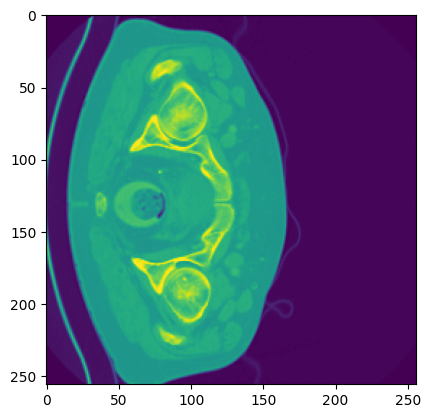

<Figure size 640x480 with 0 Axes>

In [24]:
import torch
import numpy as np
import albumentations as albu
import nibabel as nib
from numpy.lib.format import open_memmap
import cv2
from src.datasets.tsm_scan import CTScan

%load_ext memory_profiler


imagenet_mean = 0.485, 0.456, 0.406
imagenet_std = 0.229, 0.224, 0.225
grayscale_coefs = 0.2989, 0.587, 0.114

grayscale_mean = sum(m * c for m, c in zip(imagenet_mean, grayscale_coefs))
grayscale_std = sum(m * c for m, c in zip(imagenet_std, grayscale_coefs))
# grayscale, mean_nums, std_nums
print(grayscale_mean, grayscale_std)

mean, std = grayscale_mean, grayscale_std

data_transforms = {
    "train": albu.Compose(
        [
            albu.HorizontalFlip(p=0.5),
            albu.VerticalFlip(p=0.1),
            albu.ShiftScaleRotate(scale_limit=0.1, rotate_limit=10, shift_limit=0.07, p=0.5, border_mode=cv2.BORDER_CONSTANT, value=0),
            albu.Resize(256, 256, cv2.INTER_LINEAR),
            # image is expected in [0; 1] range already before normalization
            albu.Normalize(mean, std, max_pixel_value=1.0),
        ]
    ),
    "val": albu.Compose(
        [
            albu.Resize(256, 256, cv2.INTER_LINEAR),
            # image is expected in [0; 1] range already before normalization
            albu.Normalize(mean, std, max_pixel_value=1.0),
        ]
    ),
}

# scan_path = next(train_dir.rglob('s0275.nii.gz'))
scan_path = next(train_dir.rglob('s0328.nii.gz'))

scan = CTScan(scan_path, nn_dir / scan_path.name, transforms=data_transforms['val'], synth_params=dict(size=8, p=1, sigma=0.5))
# print(scan.get_sampling_labels())
sample = scan[21]

print(sample['image'].shape, sample['image'].min(), sample['image'].max())

plt.imshow(sample['image'][0])
plt.figure()
plt.imshow(sample['masks'][0])

In [ ]:
plt.show()

In [ ]:
msk = sample['masks'][0]

In [ ]:
msk.argmax(1)

In [ ]:
np.random.rand()

In [ ]:
def sample_random_mask_point(mask, margin_pct=0.1, cnt=None, rect=None):
    if cnt is None:
        cnts = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
        cnt = max(cnts, key=cv2.contourArea)
        print(cnt)
        rect = cv2.boundingRect(cnt)
    x, y, w, h = rect
    offset_x, offset_y = int(w * margin_pct / 2), int(h * margin_pct / 2)
    print(offset_x, offset_y, h, w)
    cx = np.random.randint(x + offset_x, x + w - offset_x)
    cy = np.random.randint(y + offset_y, y + h - offset_y)

    if cv2.pointPolygonTest(cnt, (cx, cy), False) != 1:
        return sample_random_mask_point(mask, cnt, (x, y, w, h))
    return (cx, cy), rect


pt, rect = sample_random_mask_point(msk.numpy().astype(np.uint8))

plt.imshow(msk)
plt.scatter(*pt, s=1)

In [ ]:
8 * 0.2

In [ ]:
msk.argmax(1)

In [ ]:
msk.argmax(0)

In [ ]:
msk.max()

In [ ]:
msk[sample['masks'][0] == 1]

In [ ]:
import numpy as np


def gaussian_blob(size, mu=0, sigma=0.5):
    x, y = np.meshgrid(np.linspace(-1, 1, size), np.linspace(-1, 1, size))
    d = np.sqrt(x**2 + y**2)
    g = np.exp(-((d - mu) ** 2 / (2.0 * sigma**2)))
    return g


img = gaussian_blob(16, sigma=0.5)
plt.imshow(img)

img.min(), img.max()

In [ ]:
plt.imshow(z)

In [ ]:
!pip install scikit-guess

In [ ]:
import numpy as np
import skg.ngauss

a = 2e6
mu = 0, 0
sigma = 0.025, 0.025

x = y = np.linspace(-1, 1, 31)

cov = np.diag(sigma) ** 2
X = np.meshgrid(x, y)

data = skg.ngauss.model(X, a, mu, cov)
plt.imshow(data)

In [ ]:
scan_labels = scan.get_sampling_labels()
scan_labels[13]

In [ ]:
import numpy as np

np.unique(np.load('data/totalsegmentor/train/tumor/s0014.nii.npy', mmap_mode='r'))

In [ ]:
scan.scan.shape

In [ ]:
img_

In [ ]:
scan.scan.shape

In [ ]:
len(scan)